This notebook goes along with the Deep Learning using Keras tutorial on Medium.

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

/Users/tcao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In this first model, we are going to predict the hourly wages of employees.

In [3]:
ls data/

diabetes_data.csv      hourly_wages_data.csv


In [4]:
#read in training data
train_df = pd.read_csv('data/hourly_wages_data.csv')

#view data structure
train_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [6]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
train_X.head()


,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [7]:
#create a dataframe with only the target column
train_y = train_df[['wage_per_hour']]

#view dataframe
train_y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [11]:
train_X.shape[1]

9

In [8]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.utils.vis_utils import plot_model
# plot graph
plot_model(model, to_file='simple_sequence_model.png',show_shapes=True, show_layer_names=True)

![simple_sequence_model](simple_sequence_model.png)

In [12]:
#train model
simple_hist = model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 0s 873us/step - loss: 41.5563 - val_loss: 56.4334
Epoch 2/30
427/427 [==============================] - 0s 43us/step - loss: 34.3372 - val_loss: 52.6911
Epoch 3/30
427/427 [==============================] - 0s 42us/step - loss: 29.0378 - val_loss: 41.9280
Epoch 4/30
427/427 [==============================] - 0s 42us/step - loss: 24.4683 - val_loss: 37.9000
Epoch 5/30
427/427 [==============================] - 0s 36us/step - loss: 20.7480 - val_loss: 28.8655
Epoch 6/30
427/427 [==============================] - 0s 34us/step - loss: 19.8144 - val_loss: 31.3000
Epoch 7/30
427/427 [==============================] - 0s 34us/step - loss: 19.6730 - val_loss: 28.3190
Epoch 8/30
427/427 [==============================] - 0s 34us/step - loss: 19.3310 - val_loss: 30.3549
Epoch 9/30
427/427 [==============================] - 0s 32us/step - loss: 19.0456 - val_loss: 28.9426
Epoch 10/30
427/427 [=====

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

class Stats:

    @staticmethod
    def plot_history_accuracy(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]

        epochs = range(1, len(acc) + 1)

        plt.plot(epochs, acc, "bo", label="Training acc")
        plt.plot(epochs, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()

        plt.figure()

        plt.plot(epochs, loss, "bo", label="Training loss")
        plt.plot(epochs, val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()

        plt.show()
    @staticmethod    
    def plot_history(history):
        
        
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]

        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, "bo", label="Training loss")
        plt.plot(epochs, val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()

        plt.show()
        
def plot_acc_loss(history):
        """Plot accuracy and loss based on model training results"""

        Stats.plot_history_accuracy(history)
        
def plot_loss(history):
        """Plot accuracy and loss based on model training results"""

        Stats.plot_history(history)

In [15]:
type(simple_hist)

keras.callbacks.History

In [16]:
for key,val in simple_hist.history.items():
    print(key)

val_loss
loss


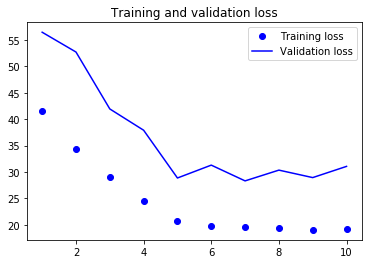

In [21]:
plot_loss(simple_hist)

# which means 

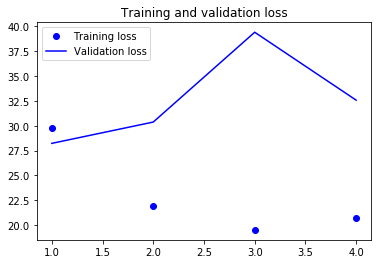

In [25]:
plot_loss(model_mc_hist)

In [22]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))
model_mc.summary()
#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 82,601
Trainable params: 82,601
Non-trainable params: 0
_________________________________________________________________


In [23]:
#train model
model_mc_hist = model_mc.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 0s 1ms/step - loss: 29.7668 - val_loss: 28.2233
Epoch 2/30
427/427 [==============================] - 0s 195us/step - loss: 21.9188 - val_loss: 30.3682
Epoch 3/30
427/427 [==============================] - 0s 197us/step - loss: 19.5086 - val_loss: 39.4113
Epoch 4/30
427/427 [==============================] - 0s 194us/step - loss: 20.7214 - val_loss: 32.5727


In [24]:
from keras.utils.vis_utils import plot_model
# plot graph
plot_model(model_mc, to_file='model_mc.png',show_shapes=True, show_layer_names=True)

![model_mc](model_mc.png)

For this next model, we are going to predict if patients have diabetes or not.

In [135]:
#read in training data
train_df_2 = pd.read_csv('documents/data/diabetes_data.csv')

#view data structure
train_df_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
#create a dataframe with all training data except the target column
train_X_2 = df_2.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [139]:
#one-hot encode target column
train_y_2 = to_categorical(df_2.diabetes)

#vcheck that target column has been converted
train_y_2[0:5]

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [140]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = train_X_2.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [142]:
#train model
model_2.fit(X_2, target, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s 240us/step - loss: 0.6972 - acc: 0.6612 - val_loss: 0.7372 - val_acc: 0.6299
Epoch 2/30
614/614 [==============================] - 0s 265us/step - loss: 0.6634 - acc: 0.6547 - val_loss: 0.7887 - val_acc: 0.6688
Epoch 3/30
614/614 [==============================] - 0s 308us/step - loss: 0.6772 - acc: 0.6889 - val_loss: 0.6767 - val_acc: 0.6623
Epoch 4/30
614/614 [==============================] - 0s 267us/step - loss: 0.6745 - acc: 0.6938 - val_loss: 0.8132 - val_acc: 0.5455
Epoch 5/30
614/614 [==============================] - 0s 228us/step - loss: 0.6251 - acc: 0.6922 - val_loss: 0.6641 - val_acc: 0.6299
Epoch 6/30
614/614 [==============================] - 0s 235us/step - loss: 0.5660 - acc: 0.7085 - val_loss: 0.6837 - val_acc: 0.5779
Epoch 7/30
614/614 [==============================] - 0s 256us/step - loss: 0.6009 - acc: 0.6922 - val_loss: 0.5935 - val_acc: 0.7013
Epoch 8/30
614/6